# Signal and Pulsar Module: Basics 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import sys
sys.path.append('/Users/jeffreyhazboun/GoogleDrive/PulsarSignalSimulator/PulsarSimulator/')
                #/home/jupyter/shared/simulator/VersionZeroPointZero/')
from VersionZeroPointZero.signal import Signal
from VersionZeroPointZero.pulsar import Pulsar
from VersionZeroPointZero.ism import ISM
%load_ext autoreload
%autoreload 2

## Signal Example

In [2]:
A = Signal() #(cen_Freq, bw, Nf, Nt, Total Time)

In [3]:
A.signal # Signal is the correct shape, but full of zeros

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
print(A.Nf)
print(A.Nt)
A.signal.shape

20
400


(20, 400)

In [5]:
A.bw

400

Changing an attribute in the larger Signal class will change it in the metadata.

In [6]:
A.bw = 115 # 
A.MetaData.bw

115

The change does not work the other way around. 

In [7]:
A.MetaData.f0 = 444 
A.f0

1400

No attribute named f1 initialized, throws error. (It's supposed to here...)

In [8]:
A.MetaData.f1 #

AttributeError: 'MetaData' object has no attribute 'f1'

In [9]:
dict1 = dict(f1=30, Profile = "Jeff's Favorite") # Define a dictionary with new atributes

In [10]:
A.MetaData.AddInfo(dict1) # Add the attributes from  the dictionary to the MetaData

In [11]:
A.MetaData.f1

30

## Pulsar Examples

### Pulsar 1: Basics

In [12]:
Sig1 = Signal() #Initialize a signal
P1 = Pulsar(Sig1) #Intialize a pulsar with that signal

In [13]:
P1.signal

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [14]:
P1.pulses() #The main command in the pulsar class. Uses a default gaussian template.

In [15]:
Sig1.MetaData.Profile #The default profile is a gaussian with peak position, width and amplitude set
# They are set in units of phase

'gaussian'

In [16]:
Sig1.MetaData.width

array(0.05)

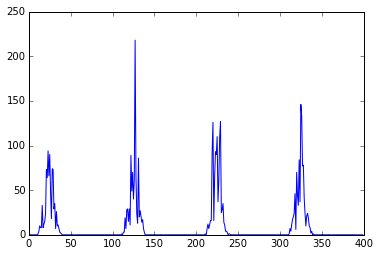

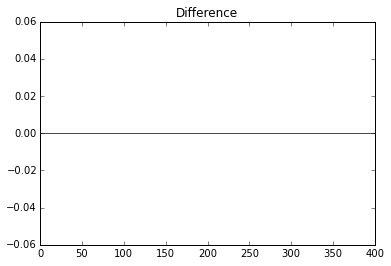

In [17]:
t = np.arange(P1.Nt)
plt.plot(t,Sig1.signal[11,:])
plt.show()
plt.title("Difference")
plt.plot(t,P1.signal[11,:]-Sig1.signal[11,:],'r')
plt.show() #The signal attribute in the Signal and Pulsar class are the same. 

### Pulsar 1a: Change Gaussian Template

In [18]:
Sig1a = Signal()
P1a = Pulsar(Sig1a)
P1a.gauss_template(.45) #gauss_template(peak, width, amplitude)
P1a.pulses()
#Define a new template the same as the previous, but with the peak moved to 0.45 in phase

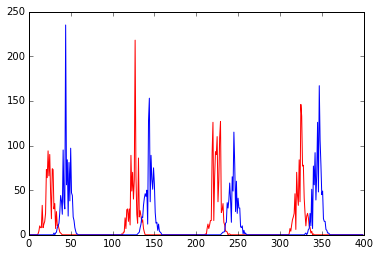

In [19]:
t = np.arange(Sig1.signal[11,:].size)
plt.plot(t,Sig1.signal[11,:],'r', t,P1a.signal[11,:])
plt.show()

In [20]:
Sig1a.MetaData.Profile

'gaussian'

In [21]:
Sig1a.MetaData.peak

array(0.45)

## Pulsar 2: Sum of Gaussian Templates

In [22]:
Sig2 = Signal()
P2 = Pulsar(Sig2)

In [23]:
peak = [0.30, 0.20] #Define the parameters of multiple gaussians, which are summed
wid = [0.05, 0.04]
amp = [1., 2.]

In [24]:
P2.gauss_template(peak,wid,amp)

In [25]:
P2.pulses()

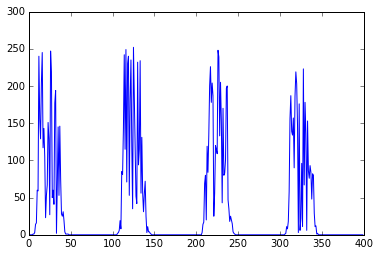

In [26]:
plt.plot(t,P2.signal[9,:])
plt.show()

In [27]:
P2.profile.size

100

In [28]:
Sig2.MetaData.Profile

'multiple gaussians'

In [29]:
Sig2.MetaData.peak

array([ 0.3,  0.2])

### Pulsar 3: User Defined Template

In [30]:
Sig3 = Signal()
P3 = Pulsar(Sig3)

In [31]:
Jeff_StepProfile1 = np.append(np.append(np.ones(50)*1e-30,np.ones(50)),np.ones(100)*1e-30)

In [32]:
P3.user_template(Jeff_StepProfile1) #Enter a user defined array 

User supplied template has been downsampled.
Input array length=  200 . Pulse template length=  100 .


Built into the code is a rebinning script. If your template is larger than the number of time bins allocated to a single period, it is automatically downsampled to fit.

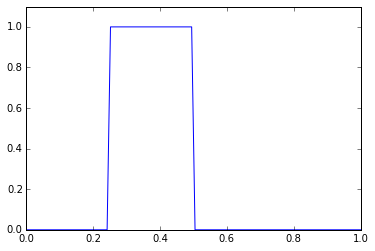

In [33]:
plt.ylim(0,1.1)
plt.plot(P3.phase,P3.profile)
plt.show()

In [34]:
P3.pulses()

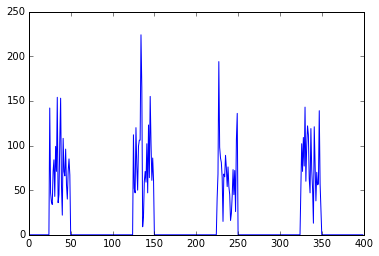

In [35]:
#plt.ylim(0,1.9)
t3 = np.arange(P3.signal[3,:].size)
plt.plot(t3, P3.signal[3,:])
plt.show()

In [36]:
Sig3.MetaData.Profile

'user_defined'

In [37]:
Sig3.MetaData.peak

'None'

Currently the "peak", "width" and "amplitude" parameter values are replaced by "None" for user defined templates.